<a href="https://colab.research.google.com/github/roloport/cryoET/blob/main/DeepFindET_rolo_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3D CNN Instance Segmentation of Proteins in cryoET Tomograms

In [1]:
!pip install copick git+https://github.com/copick/copick-utils.git git+https://github.com/copick/DeepFindET.git

  Cloning https://github.com/copick/copick-utils.git to /tmp/pip-req-build-xarsxz5v
  Running command git clone --filter=blob:none --quiet https://github.com/copick/copick-utils.git /tmp/pip-req-build-xarsxz5v
  Resolved https://github.com/copick/copick-utils.git to commit d72192abb2d18dcd0ff8caa749f2327cf24ce894
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/copick/DeepFindET.git to /tmp/pip-req-build-1msamt5f
  Running command git clone --filter=blob:none --quiet https://github.com/copick/DeepFindET.git /tmp/pip-req-build-1msamt5f
  Resolved https://github.com/copick/DeepFindET.git to commit 15cef0e7a6000ea73df440042a8999812992e57d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setu

In [2]:
# config file
config_blob = """{
  "name": "czii_cryoet_mlchallenge_2024",
  "description": "2024 CZII CryoET ML Challenge training data.",
  "version": "1.0.0",

  "pickable_objects":[
    {
            "name": "apo-ferritin",
            "is_particle": true,
            "pdb_id": "4V1W",
            "label": 1,
            "color": [  0, 117, 220, 128],
            "radius": 60,
            "map_threshold": 0.0418
        },
        {
            "name": "beta-amylase",
            "is_particle": true,
            "pdb_id": "1FA2",
            "label": 2,
            "color": [153,  63,   0, 128],
            "radius": 65,
            "map_threshold": 0.035
        },
        {
            "name": "beta-galactosidase",
            "is_particle": true,
            "pdb_id": "6X1Q",
            "label": 3,
            "color": [ 76,   0,  92, 128],
            "radius": 90,
            "map_threshold": 0.0578
        },
        {
            "name": "ribosome",
            "is_particle": true,
            "pdb_id": "6EK0",
            "label": 4,
            "color": [  0,  92,  49, 128],
            "radius": 150,
            "map_threshold": 0.0374
        },
        {
            "name": "thyroglobulin",
            "is_particle": true,
            "pdb_id": "6SCJ",
            "label": 5,
            "color": [ 43, 206,  72, 128],
            "radius": 130,
            "map_threshold": 0.0278
        },
        {
            "name": "virus-like-particle",
            "is_particle": true,
            "label": 6,
            "color": [255, 204, 153, 128],
            "radius": 135,
            "map_threshold": 0.201
        },
        {
            "name": "membrane",
            "is_particle": false,
            "label": 8,
            "color": [100, 100, 100, 128]
        },
        {
            "name": "background",
            "is_particle": false,
            "label": 9,
            "color": [10, 150, 200, 128]
        }
  ],

  "overlay_root": "/content/drive/MyDrive/cryoET/output/test/overlay",

  "overlay_fs_args":{
    "auto_mkdir": true
  },

  "static_root":"/content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/test/static"
}"""

copick_config_path = "/content/drive/MyDrive/cryoET/output/copick.config"
output_overlay = "/content/drive/MyDrive/cryoET/output/test/overlay"

with open(copick_config_path, "w") as f:
  f.write(config_blob)


## Step 3. Perform Inference on Test Data and Evaluate Results

In [3]:
from deepfindET.entry_points import step3
from deepfindET.utils import copick_tools
import matplotlib.pyplot as plt
import numpy as np
import copick

%matplotlib inline

########################## Input Params #######################

# Copick config file
config = copick_config_path

# model parameters
n_class = 8
patch_size = 160
model_name = 'res_unet'
filters = [48, 64, 128]
dropout = 0

# path to the pre-trained model weights
model_weights = '/content/drive/MyDrive/cryoET/weights_30epechs/net_weights_epoch30.h5'

# Query for Tomogram
voxel_size = 10
tomogram_algorithm = 'denoised'

# Output segmentation write name
segmentation_name = 'predict'
session_id = '0'
user_id = 'deepfindET'

################################################################

In [4]:
# Run the train DeepFindET 3D U-Net model on copick directory
step3.inference_tomogram_segmentation(
    config,
    n_class,
    model_name,
    model_weights,
    patch_size,
    user_id,
    session_id,
    segmentation_name = segmentation_name,
    voxel_size = voxel_size,
    model_filters = filters,
    model_dropout = dropout,
    tomogram_algorithm = tomogram_algorithm,
)


Training res_unet with /content/drive/MyDrive/cryoET/weights_30epechs/net_weights_epoch30.h5 Weights


Segmentation Parameters:  {
    "input": {
        "predict_config": "/content/drive/MyDrive/cryoET/output/copick.config",
        "voxel_size": 10,
        "tomogram_algorithm": "denoised"
    },
    "model_architecture": {
        "n_class": 8,
        "model_name": "res_unet",
        "path_weights": "/content/drive/MyDrive/cryoET/weights_30epechs/net_weights_epoch30.h5",
        "patch_size": 160,
        "model_filters": [
            48,
            64,
            128
        ],
        "model_dropout": 0
    },
    "output": {
        "user_id": "deepfindET",
        "session_id": "0",
        "output_scoremap": false,
        "scoremap_name": "scoremap",
        "segmentation_name": "predict",
        "tomo_ids": null
    }
} 


Processing Run: TS_5_4 (0/3)
Data array is divided in 72 patches ...
Segmenting patch 1 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 57s 57s/step
Segmenting pa

In [5]:
# import tensorflow as tf

# model = tf.keras.models.load_model(model_weights)
# for layer in model.layers:
#   for weight in layer.weights:
#     print(weight.numpy())

Visualize the Segmentation

In [6]:
# Specify a run to visualize
runID = 'TS_5_4'

# Retrieve the sepecific run object from CoPick
copick_root = copick.from_file(config)
copick_run = copick_root.get_run(runID)

# Extract segmentation target associated with the run
# The function get_copick_segmentation retrieves the segmentation data
# (e.g., target volume) based on the run object,
# segmentation name, user ID, and session ID.
train_target = copick_tools.get_copick_segmentation(
    copick_run,
    segmentationName = segmentation_name,
    userID = user_id,
    sessionID = session_id,
)

# Retrieve the tomogram
train_tomogram = copick_tools.get_copick_tomogram(
    copick_root,
    voxelSize = voxel_size,
    tomoAlgorithm =  tomogram_algorithm,
    tomoID = runID,
)

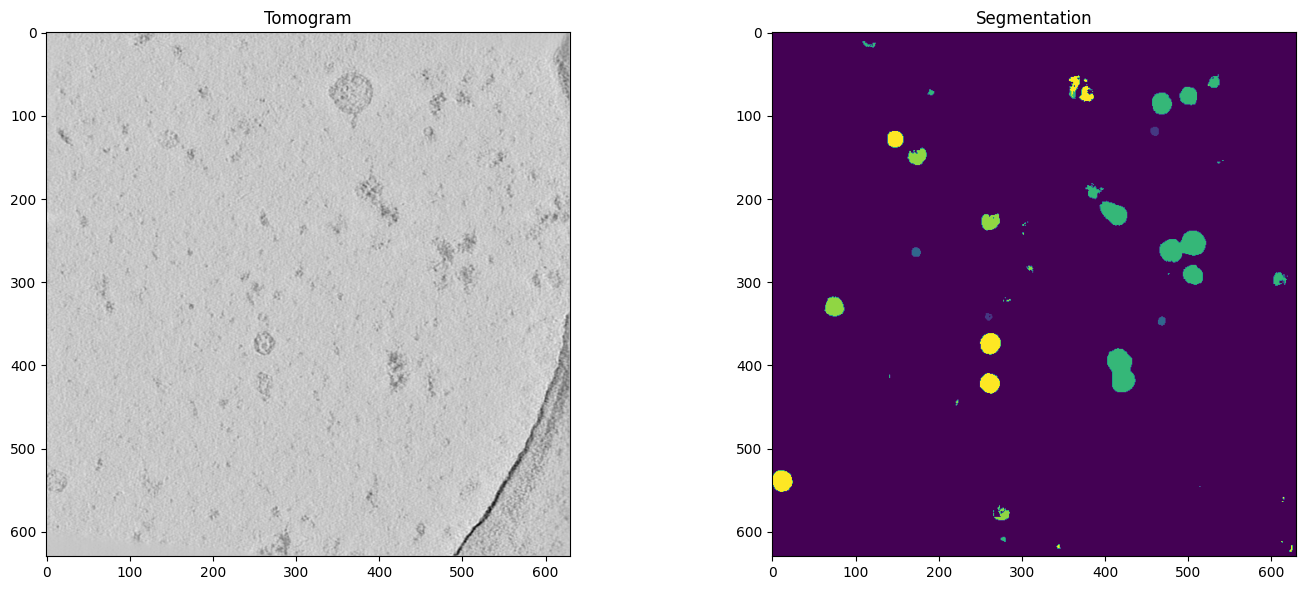

In [7]:
# Plot the images
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Tomogram')
plt.imshow(train_tomogram[90,], cmap='gray')
# plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentation')
plt.imshow(train_target[90,])
# plt.axis('off')

plt.tight_layout()
plt.show()

## Step 4. Measure protein coodinates from segmentation maps



In [8]:
from deepfindET.entry_points import step4

# session ID for the output picks
picks_session_id = '0'

segmentation_session_id = '0'

segmentation_name = 'predict'

min_protein_size = 0.4

path_output = f'{copick_root.root_overlay}/ExperimentRuns'

In [9]:
[obj.radius for obj in copick_root.pickable_objects]

[60.0, 65.0, 90.0, 150.0, 130.0, 135.0, None, None]

In [10]:
import deepfindET.utils.copick_tools as tools
import deepfindET.utils.evaluate as evaluate
import scipy.ndimage as ndimage
from tqdm import tqdm

# Currently Filtering Process always finds coordinate at (cx,cy,cz) - center coordinate
# This seems to always be at the first row, so we can remove it
remove_index = 0

# Extract protein coordinates from the segmentation masks

def extract_coords(pickable_object, copick_run):
  labelmap = tools.get_copick_segmentation(
      copick_run,
      segmentation_name,
      user_id,
      segmentation_session_id)[:]
  label = pickable_object.label
  protein_name = pickable_object.name
  label_objs, _ = ndimage.label(labelmap == label)

  # Filter candidates based on Object Size
  # Get the sizes of all objects
  object_sizes = np.bincount(label_objs.flat)

  # Filter the objects based on size
  min_object_size = 4/3 * np.pi * ((pickable_object.radius/voxel_size)**2)*min_protein_size
  valid_objects = np.where(object_sizes > min_object_size)[0]

  # Estimate coordinates from CoM for LabelMaps
  deepFinderCoords = []
  for object_num in tqdm(valid_objects):
    com = ndimage.center_of_mass(label_objs == object_num)
    swapped_com = (com[2], com[1], com[0])
    deepFinderCoords.append(swapped_com)
  deepFinderCoords = np.array(deepFinderCoords)

  # For same reason, consistently extracting center coordinate
  # Remove the row with the closest index
  deepFinderCoords = np.delete(deepFinderCoords, remove_index, axis=0)

  # Estimate Distance Threshold based on 1/2 of particle dismeter
  threshold = np.ceil(pickable_object.radius / (voxel_size * 3))

  try:
    # remove double counted coordinates
    deepFinderCoords = evaluate.remove_repeated_picks(deepFinderCoords, threshold)

    # append Euler Angles to Coordinates [Expand Dimensions from Nx3 -> Nx6]
    deepFinderCoords = np.concatenate((deepFinderCoords, np.zeros(deepFinderCoords.shape)),axis=1)

    # convert from voxel to Physical Units
    deepFinderCoords *= voxel_size

  except Exception as e:
    print(f"Error processing label {label} in tomo {copick_run}: {e}")
    deepFinderCoords = np.array([]).reshape(0, 6)

  # Save picks in Copick Format / Directory
  tools.write_copick_output(protein_name,
                            copick_run.meta.name,
                            deepFinderCoords,
                            path_output,
                            pickMethod = user_id,
                            sessionID = picks_session_id,
                            )

for run in copick_root.runs:
  print(f"Run: {run}")
  for pickable_object in copick_root.pickable_objects:
    print(pickable_object.name)
    if pickable_object.is_particle:
      extract_coords(pickable_object, run)


Run: CopickRun(name=TS_5_4, len(voxel_spacings)=None, len(picks)=None, len(meshes)=None, len(segmentations)=None) at 0x7da11db75360
apo-ferritin


100%|██████████| 58/58 [00:50<00:00,  1.15it/s]


beta-amylase


100%|██████████| 61/61 [00:53<00:00,  1.15it/s]


beta-galactosidase


100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Error processing label 3 in tomo CopickRun(name=TS_5_4, len(voxel_spacings)=None, len(picks)=None, len(meshes)=None, len(segmentations)=1) at 0x7da11db75360: The number of observations cannot be determined on an empty distance matrix.
ribosome


100%|██████████| 55/55 [00:48<00:00,  1.13it/s]


thyroglobulin


100%|██████████| 48/48 [00:41<00:00,  1.15it/s]


virus-like-particle


100%|██████████| 28/28 [00:23<00:00,  1.17it/s]


membrane
background
Run: CopickRun(name=TS_69_2, len(voxel_spacings)=None, len(picks)=None, len(meshes)=None, len(segmentations)=None) at 0x7da11db75150
apo-ferritin


100%|██████████| 54/54 [00:46<00:00,  1.15it/s]


beta-amylase


100%|██████████| 60/60 [00:51<00:00,  1.16it/s]


beta-galactosidase


100%|██████████| 11/11 [00:09<00:00,  1.22it/s]


ribosome


100%|██████████| 52/52 [00:45<00:00,  1.14it/s]


thyroglobulin


100%|██████████| 46/46 [00:39<00:00,  1.15it/s]


virus-like-particle


100%|██████████| 38/38 [00:32<00:00,  1.16it/s]


membrane
background
Run: CopickRun(name=TS_6_4, len(voxel_spacings)=None, len(picks)=None, len(meshes)=None, len(segmentations)=None) at 0x7da11db75120
apo-ferritin


100%|██████████| 69/69 [00:59<00:00,  1.16it/s]


beta-amylase


100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


beta-galactosidase


100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


ribosome


100%|██████████| 55/55 [00:47<00:00,  1.15it/s]


thyroglobulin


100%|██████████| 52/52 [00:45<00:00,  1.15it/s]


virus-like-particle


100%|██████████| 32/32 [00:27<00:00,  1.16it/s]


membrane
background


## Step 5. Generate scv file of coords

In [11]:
import os
import csv

os.listdir("/content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/test/static/ExperimentRuns")

results = []
pick_id = 0

# id, experiment, particle_type, x, y, z
for run in copick_root.runs:
  run_id = run.meta.name
  for particle_type in copick_root.pickable_objects:
    picks = run.get_picks(particle_type.name, user_id="deepfindET")
    if picks:
      picks = picks[0]
      points = picks.points
      for point in points:
        row = [pick_id, run_id, particle_type.name,
               point.location.x, point.location.y, point.location.z]
        results.append(row)
        pick_id += 1

print(f"Found {len(results)} picks")

# Define CSV output file path
output_csv_path = "/content/drive/MyDrive/cryoET/weights_30epechs/submission_epech30.csv"

# write results to CSV
with open(output_csv_path, mode='w', newline='') as file:
  writer = csv.writer(file)
  # write header
  writer.writerow(["id", "experiment", "particle_type", "x", "y", "z"])
  # write data rows
  writer.writerows(results)


Found 761 picks


In [12]:
copick_root.pickable_objects[2].label

3

In [13]:
picks = run.get_picks(copick_root.pickable_objects[2].name, user_id="deepfindET")

In [14]:
len(picks)

1

In [15]:
print("Debugging Info:")
print(f"Number of runs: {len(copick_root.runs)}")
for run in copick_root.runs:
    print(f"Run ID: {run.meta.name}")
    for particle_type in copick_root.pickable_objects:
        print(f"Checking particle type: {particle_type.name}")
        picks = run.get_picks(particle_type.name, user_id="deepfindET")
        if picks:
            print(f"Found picks for {particle_type.name} in run {run.meta.name}")
        else:
            print(f"No picks for {particle_type.name} in run {run.meta.name}")


Debugging Info:
Number of runs: 3
Run ID: TS_5_4
Checking particle type: apo-ferritin
Found picks for apo-ferritin in run TS_5_4
Checking particle type: beta-amylase
Found picks for beta-amylase in run TS_5_4
Checking particle type: beta-galactosidase
Found picks for beta-galactosidase in run TS_5_4
Checking particle type: ribosome
Found picks for ribosome in run TS_5_4
Checking particle type: thyroglobulin
Found picks for thyroglobulin in run TS_5_4
Checking particle type: virus-like-particle
Found picks for virus-like-particle in run TS_5_4
Checking particle type: membrane
No picks for membrane in run TS_5_4
Checking particle type: background
No picks for background in run TS_5_4
Run ID: TS_69_2
Checking particle type: apo-ferritin
Found picks for apo-ferritin in run TS_69_2
Checking particle type: beta-amylase
Found picks for beta-amylase in run TS_69_2
Checking particle type: beta-galactosidase
Found picks for beta-galactosidase in run TS_69_2
Checking particle type: ribosome
Found